# FIA adonis in qiime

In [1]:
import pandas as pd
import os

import tkinter as tk

In [2]:
import qiime2 as q2

from qiime2 import (Artifact,
                    Metadata as qmd)

from qiime2.plugins import (cutadapt,
                            demux,
                            feature_table as qft,
                            taxa as q2t,)

from qiime2 import Metadata
from qiime2 import Visualization

from qiime2.plugins.feature_table.methods import (merge_seqs, merge, filter_seqs, filter_samples, filter_features) 
import qiime2.plugins.feature_classifier.actions as feature_classifier_actions
import qiime2.plugins.metadata.actions as metadata_actions
import qiime2.plugins.taxa.actions as taxa_actions
import qiime2.plugins.phylogeny.actions as phylogeny_actions
from qiime2.plugins.fragment_insertion.methods import sepp


%matplotlib inline

fatal: bad revision 'HEAD'
fatal: bad revision 'HEAD'


In [3]:
pwd

'/Users/meyeanni/Desktop/git_sourdough/SourdoughFlow/LP4/shipping_analysis'

In [3]:
import os
import qiime2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the working directory
wd = '/Users/meyeanni/Desktop/git_sourdough/SourdoughFlow/LP4/shipping_analysis/shipping_data'

# Change to the working directory
os.chdir(wd)

# Verify current working directory
print("Current working directory:", os.getcwd())

Current working directory: /Users/meyeanni/Desktop/git_sourdough/SourdoughFlow/LP4/shipping_analysis/shipping_data


In [4]:
# import this csv: FIA/20250516_fia_feature_table_z.csv
# Read the CSV file into a DataFrame
df_z = pd.read_csv('FIA/20250516_fia_feature_table_z.csv', index_col=0)

df_log = pd.read_csv('FIA/20250516_fia_feature_table_log.csv', index_col=0)

df_log_z = pd.read_csv('FIA/20250516_fia_feature_table_log_z.csv', index_col=0)

df_tss = pd.read_csv('FIA/20250516_fia_feature_table_tss.csv', index_col=0)


## compute PCAs

In [33]:
# from scipy.spatial.distance import pdist, squareform
# from sklearn.metrics import pairwise_distances

# # Bray-Curtis dissimilarity
# bray_dm_FIA = pd.DataFrame(
#     squareform(pdist(df_rarefied, metric='braycurtis')),
#     index=df_rarefied.index,
#     columns=df_rarefied.index
# )

# # Convert to binary (presence/absence)
# binary = df_rarefied > 0

# # Jaccard distance
# jaccard_dm_FIA = pd.DataFrame(
#     squareform(pdist(binary, metric='jaccard')),
#     index=df_rarefied.index,
#     columns=df_rarefied.index
# )



In [34]:
# #convert them to distance matrices:
# from skbio.stats.distance import DistanceMatrix

# # Bray-Curtis
# bray_dm_FIA = DistanceMatrix(bray_dm_FIA.values, ids=bray_dm_FIA.index)

# # Jaccard
# jaccard_dm_FIA = DistanceMatrix(jaccard_dm_FIA.values, ids=jaccard_dm_FIA.index)


In [35]:
# from skbio.stats.ordination import pcoa

# dms = {
#     'bray_dm_FIA': bray_dm_FIA,
#     'jaccard_dm_FIA': jaccard_dm_FIA
#     }

then, calculate pcoas

In [36]:
# import pandas as pd
# from skbio.stats.ordination import pcoa



# # Function to compute PCoA
# def compute_pcoa(distance_matrix, n_components=2):
#     """Performs PCoA on a distance matrix and returns coordinates + variance explained."""
#     # Run PCoA
#     pcoa_res = pcoa(distance_matrix)
    
#     # Extract transformed coordinates
#     coordinates = pd.DataFrame(
#         pcoa_res.samples.iloc[:, :n_components].values,  # Get first n PCoA components
#         index=distance_matrix.ids,  # Keep original sample names
#         columns=[f"PCo{i+1}" for i in range(n_components)]  # Rename components
#     )
    
#     # Extract variance explained (proportion of total variance per component)
#     variance_explained = pcoa_res.proportion_explained.values[:n_components]

#     return coordinates, variance_explained

In [67]:
df_tss

,M275.1469,M101.3082,M101.3289,M101.3866,M101.1397,M101.4131,M101.4016,M101.3213,M101.4429,M101.2945,...,M406.1193,M370.1392,M404.1033,M371.1358,M280.9969,M487.3036,M600.3885,M602.3878,M650.4282,M627.4082
366294_209-LP4-16S-0709,0.000000,0.001073,0.000965,0.000558,0.000000,0.000551,0.000694,0.000537,0.000445,0.000892,...,0.004077,0.000000,0.008436,0.001375,0.001416,0.000000,0.000905,0.000423,0.001152,0.000883
366294_255-LP4-16S-0755,0.000511,0.001150,0.000946,0.001200,0.000836,0.000000,0.000780,0.000814,0.000594,0.001174,...,0.002138,0.001834,0.002995,0.006597,0.002504,0.001061,0.001500,0.000696,0.000901,0.000958
366294_237-LP4-16S-0737,0.000000,0.001709,0.001154,0.000776,0.000713,0.000917,0.000872,0.001197,0.000972,0.001560,...,0.001077,0.001205,0.001685,0.004105,0.002319,0.000000,0.001472,0.000598,0.001301,0.001184
366294_198-LP4-16S-0698,0.000000,0.001667,0.001841,0.000816,0.000868,0.001139,0.000776,0.001841,0.000671,0.001164,...,0.001595,0.001645,0.001813,0.007294,0.002771,0.001131,0.001765,0.000844,0.001330,0.001319
366294_240-LP4-16S-0740,0.000785,0.002176,0.001206,0.001184,0.001283,0.000798,0.000808,0.001136,0.001094,0.001648,...,0.000769,0.001292,0.001236,0.004449,0.002634,0.000813,0.001754,0.000000,0.001246,0.001401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366294_231-LP4-16S-0731,0.000391,0.000769,0.000496,0.000515,0.000396,0.000000,0.000288,0.000000,0.000000,0.000000,...,0.000000,0.001190,0.000000,0.004555,0.000927,0.000341,0.000933,0.000412,0.000629,0.000533
366294_196-LP4-16S-0696,0.000320,0.000650,0.000275,0.000464,0.000433,0.000314,0.000169,0.000000,0.000000,0.000306,...,0.000187,0.001443,0.000153,0.006000,0.000661,0.000259,0.000665,0.000299,0.000405,0.000365
366294_245-LP4-16S-0745,0.000403,0.000539,0.000371,0.000314,0.000344,0.000000,0.000000,0.000371,0.000353,0.000334,...,0.000000,0.000927,0.000000,0.003308,0.000889,0.000361,0.000835,0.000355,0.000574,0.000475
366294_252-LP4-16S-0752,0.000252,0.000215,0.000256,0.000171,0.000148,0.000169,0.000160,0.000238,0.000288,0.000269,...,0.000197,0.001042,0.000153,0.004220,0.000287,0.000158,0.000447,0.000212,0.000317,0.000258


pcas instead of pcoas:

In [22]:
import pandas as pd
from sklearn.decomposition import PCA

# Function to compute PCA
def compute_pca(data, n_components=2):
    """Performs PCA on a DataFrame and returns principal components + variance explained."""
    
    # Initialize PCA
    pca = PCA(n_components=n_components)
    
    # Fit and transform the data to get the principal components
    pca_result = pca.fit_transform(data)
    
    # Convert the result to a DataFrame
    pca_coordinates = pd.DataFrame(
        pca_result, 
        index=data.index,  # Keep original sample names
        columns=[f"PC{i+1}" for i in range(n_components)]  # Name the components
    )
    
    # Get the proportion of variance explained by each component
    variance_explained = pca.explained_variance_ratio_[:n_components]

    return pca_coordinates, variance_explained

# Example usage
# Assuming 'data_normalized_log_z_df' is your z-score normalized DataFrame
pca_log_z_FIA, variance_log_z_FIA = compute_pca(df_log_z, n_components=2)
pca_log_FIA, variance_log_FIA = compute_pca(df_log, n_components=2)
pca_z_FIA, variance_z_FIA = compute_pca(df_z, n_components=2)
pca_tss_FIA, variance_tss_FIA = compute_pca(df_tss, n_components=2)




In [37]:
# pcoa_jaccard_ASV, variance_jaccard_ASV = compute_pcoa(jaccard_dm_16S_ASV)
# pcoa_bray_curtis_ASV, variance_bray_curtis_ASV = compute_pcoa(bray_dm_16S_ASV)
# pcoa_jaccard_ASV_merged, variance_jaccard_ASV_merged = compute_pcoa(jaccard_dm_16S_ASV_merged)
# pcoa_bray_curtis_ASV_merged, variance_bray_curtis_ASV_merged = compute_pcoa(bray_dm_16S_ASV_merged)

# pcoa_jaccard_OTU, variance_jaccard_OTU = compute_pcoa(jaccard_dm_16S_OTU)
# pcoa_bray_curtis_OTU, variance_bray_curtis_OTU = compute_pcoa(bray_dm_16S_OTU)
# pcoa_jaccard_OTU_merged, variance_jaccard_OTU_merged = compute_pcoa(jaccard_dm_16S_OTU_merged)
# pcoa_bray_curtis_OTU_merged, variance_bray_curtis_OTU_merged = compute_pcoa(bray_dm_16S_OTU_merged)

# pcoa_jaccard_k, variance_jaccard_k = compute_pcoa(jaccard_dm_16S_k)
# pcoa_bray_curtis_k, variance_bray_curtis_k = compute_pcoa(bray_dm_16S_k)
# pcoa_jaccard_k_merged, variance_jaccard_k_merged = compute_pcoa(jaccard_dm_16S_k_merged)
# pcoa_bray_curtis_k_merged, variance_bray_curtis_k_merged = compute_pcoa(bray_dm_16S_k_merged)

# pcoa_jaccard_kt, variance_jaccard_kt = compute_pcoa(jaccard_dm_16S_kt)
# pcoa_bray_curtis_kt, variance_bray_curtis_kt = compute_pcoa(bray_dm_16S_kt)
# pcoa_jaccard_kt_merged, variance_jaccard_kt_merged = compute_pcoa(jaccard_dm_16S_kt_merged)
# pcoa_bray_curtis_kt_merged, variance_bray_curtis_kt_merged = compute_pcoa(bray_dm_16S_kt_merged)

# pcoa_jaccard_FIA, variance_jaccard_FIA = compute_pcoa(jaccard_dm_FIA)
# pcoa_bray_curtis_FIA, variance_bray_curtis_FIA = compute_pcoa(bray_dm_FIA)

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:146: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.005141976431112617 and the largest is 3.492723905180741.
  warn(
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:146: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be usefu

In [11]:
# #import this .json file cud_temperature_time_gradient_palette.json in 16S/:


# # Load the JSON file
# import json
# with open('16S/cud_temperature_time_gradient_palette.json', 'r') as f:
#     gradient_palette = json.load(f)

In [12]:
# gradient_palette

{'17°C (Bluish Green)': {'1': '#003f2e',
  '2': '#004935',
  '3': '#00523c',
  '4': '#005c43',
  '5': '#00654a',
  '6': '#006f50',
  '7': '#007857',
  '10': '#00825e',
  '14': '#008b65',
  '21': '#00956c',
  '28': '#009e73'},
 '30°C (Orange)': {'1': '#5c4000',
  '2': '#6a4900',
  '3': '#785300',
  '4': '#855c00',
  '5': '#936600',
  '6': '#a16f00',
  '7': '#af7900',
  '10': '#bd8200',
  '14': '#ca8c00',
  '21': '#d89500',
  '28': '#e69f00'},
 '4°C (Sky Blue)': {'1': '#22485d',
  '2': '#28536b',
  '3': '#2d5e79',
  '4': '#326887',
  '5': '#377395',
  '6': '#3c7ea3',
  '7': '#4189b1',
  '10': '#4794bf',
  '14': '#4c9ecd',
  '21': '#51a9db',
  '28': '#56b4e9'}}

In [5]:
#import sample metadata called shipping_general_metadata_all_samples.tsv as a dataframe, index is col 'SampleID'
#import this 20250513_16S_shipping_general_metadata_all_samples_with_alpha_diversity_color_scheme.csv:

shipping_general_metadata_all_samples = pd.read_csv('20250513_ITS_shipping_general_metadata_all_samples_with_alpha_diversity_16S_ITS.csv', sep=',', index_col=4)

shipping_general_metadata_all_samples



,Unnamed: 0,Chao1 kmers ITS,Chao1 OTUs ITS,Chao1 ASVs ITS,Chao1 kmers,Chao1 OTUs,Chao1 ASVs,identifier,row,column,...,Observed features kmers ITS,Shannon ASVs ITS,Evenness ASVs ITS,Simpson ASVs ITS,Shannon OTUs ITS,Evenness OTUs ITS,Simpson OTUs ITS,Shannon kmers ITS,Evenness kmers ITS,Simpson kmers ITS
16S_id,,,,,,,,,,,,,,,,,,,,,
366294_209-LP4-16S-0709,366292_209-LP4-ITS-0709,747.0,2.00,4.000000,678.0,5.0,4.0,W00.00.00,E,5,...,747.0,1.023700,0.511850,0.387775,0.301049,0.301049,0.101261,8.420116,0.882153,0.996797
366294_121-LP4-16S-0621,366292_121-LP4-ITS-0621,1052.0,4.00,6.000000,244.0,1.0,1.0,W30.02.28,E,6,...,1052.0,0.973628,0.376651,0.377949,0.220637,0.110319,0.056100,8.340575,0.830824,0.996682
366294_212-LP4-16S-0712,366292_212-LP4-ITS-0712,1253.0,7.50,7.000000,718.0,5.0,6.0,W30.03.21,H,5,...,1253.0,0.813642,0.289825,0.337533,0.091995,0.032769,0.017630,8.253068,0.801956,0.996594
366294_225-LP4-16S-0725,366292_225-LP4-ITS-0725,1212.0,5.00,7.000000,708.0,6.0,5.0,W17.02.14,E,7,...,1212.0,0.800344,0.285088,0.338125,0.051600,0.022223,0.009683,8.229968,0.803459,0.996578
366294_201-LP4-16S-0701,366292_201-LP4-ITS-0701,1204.0,5.00,8.000000,708.0,5.0,5.0,W04.02.04,E,4,...,1204.0,1.144517,0.381506,0.390090,0.329954,0.142104,0.083077,8.529651,0.833493,0.996862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366294_181-LP4-16S-0681,366292_181-LP4-ITS-0681,3357.0,23.50,26.428571,708.0,5.0,5.0,W30.03.03,A,2,...,3357.0,1.155855,0.248900,0.388582,0.459375,0.103012,0.101151,8.474403,0.723507,0.996769
366294_251-LP4-16S-0751,366292_251-LP4-ITS-0751,3265.0,16.25,34.000000,708.0,5.0,8.0,W04.03.01,G,10,...,3265.0,1.052332,0.226607,0.377837,0.284167,0.071042,0.057944,8.393120,0.719028,0.996696
366294_260-LP4-16S-0760,366292_260-LP4-ITS-0760,3137.0,23.50,32.000000,708.0,5.0,5.0,W30.02.01,H,11,...,3137.0,1.222896,0.263336,0.410682,0.527800,0.116678,0.117316,8.511062,0.732754,0.996812


In [6]:
from matplotlib.colors import to_rgb, to_hex
import numpy as np

# Define base colors (lightest) for each temperature
# base_colors = {
#     '4°C (Sky Blue)': '#56b4e9',
#     '17°C (Bluish Green)': '#009e73',
#     '30°C (Orange)': '#e69f00'
# }
base_colors = {
    '4°C (Sky Blue)': '#9EC8FFFF',
    '17°C (Bluish Green)': '#FDC067FF',
    '30°C (Orange)': '#751C6DFF'
}



# Define the time points
time_points = ['1', '2', '3', '4', '5', '6', '7', '10', '14', '21', '28']
n_points = len(time_points)

# Create darker-to-lighter gradients
gradient_palette_adjusted = {}

for label, hex_color in base_colors.items():
    base_rgb = np.array(to_rgb(hex_color))
    gradient = {}
    for i, tp in enumerate(time_points):
        factor = 0.2 + 0.8 * (i / (n_points - 1))  # Linear scale from dark (0.4) to original (1.0)
        adjusted_rgb = tuple(base_rgb * factor)
        gradient[tp] = to_hex(adjusted_rgb)
    gradient_palette_adjusted[label] = gradient

gradient_palette_adjusted


{'4°C (Sky Blue)': {'1': '#202833',
  '2': '#2c3847',
  '3': '#39485c',
  '4': '#465870',
  '5': '#526885',
  '6': '#5f7899',
  '7': '#6b88ad',
  '10': '#7898c2',
  '14': '#85a8d6',
  '21': '#91b8eb',
  '28': '#9ec8ff'},
 '17°C (Bluish Green)': {'1': '#332615',
  '2': '#47361d',
  '3': '#5b4525',
  '4': '#6f542d',
  '5': '#846436',
  '6': '#98733e',
  '7': '#ac8346',
  '10': '#c0924e',
  '14': '#d5a157',
  '21': '#e9b15f',
  '28': '#fdc067'},
 '30°C (Orange)': {'1': '#170616',
  '2': '#21081f',
  '3': '#2a0a27',
  '4': '#330c30',
  '5': '#3d0f39',
  '6': '#461141',
  '7': '#50134a',
  '10': '#591553',
  '14': '#62185c',
  '21': '#6c1a64',
  '28': '#751c6d'}}

In [7]:
#import 20250515_fia_16S_ITS_shipping_general_metadata.csv:
md = pd.read_csv('FIA/20250515_fia_16S_ITS_shipping_general_metadata.csv', sep=',', index_col=0)

In [8]:
md

,Unnamed: 0,Chao1 kmers ITS,Chao1 OTUs ITS,Chao1 ASVs ITS,Chao1 kmers,Chao1 OTUs,Chao1 ASVs,identifier,row,column,...,Evenness OTUs ITS,Simpson OTUs ITS,Shannon kmers ITS,Evenness kmers ITS,Simpson kmers ITS,Observed features FIA,Chao1 FIA,Shannon FIA,Simpson FIA,Evenness FIA
16S_id,,,,,,,,,,,,,,,,,,,,,
366294_217-LP4-16S-0717,366292_217-LP4-ITS-0717,1204.0,5.000000,8.00,588.000000,3.0,3.0,W04.02.01,E,6,...,0.107406,0.058532,8.480431,0.828683,0.996810,600.0,600.0,7.659309,0.982243,1.197341
366294_255-LP4-16S-0755,366292_255-LP4-ITS-0755,2285.0,15.000000,17.00,708.000000,5.0,5.0,W04.01.01,C,11,...,0.064754,0.053929,8.378933,0.750937,0.996693,471.0,471.0,7.455047,0.982054,1.211246
366294_251-LP4-16S-0751,366292_251-LP4-ITS-0751,3265.0,16.250000,34.00,708.000000,5.0,8.0,W04.03.01,G,10,...,0.071042,0.057944,8.393120,0.719028,0.996696,437.0,437.0,7.420627,0.981258,1.220511
366294_223-LP4-16S-0723,366292_223-LP4-ITS-0723,1953.0,11.333333,11.00,678.000000,3.0,5.0,W04.03.02,C,7,...,0.047115,0.032811,8.303357,0.759582,0.996632,702.0,702.0,7.751500,0.981927,1.182725
366294_177-LP4-16S-0677,366292_177-LP4-ITS-0677,1960.0,17.333333,19.00,473.004386,4.5,2.0,W04.02.02,E,1,...,0.056046,0.043449,8.305815,0.759449,0.996637,566.0,566.0,7.648832,0.980807,1.206708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366294_239-LP4-16S-0739,366292_239-LP4-ITS-0739,1536.0,5.000000,8.20,708.000000,5.0,5.0,W30.01.21,C,9,...,0.015633,0.006276,8.216056,0.776201,0.996566,958.0,958.0,9.007755,0.994265,1.312157
366294_173-LP4-16S-0673,366292_173-LP4-ITS-0673,2477.0,18.500000,18.75,718.000000,5.0,6.0,W30.02.21,A,1,...,0.064827,0.053488,8.357678,0.741298,0.996672,984.0,984.0,9.074795,0.994835,1.316786
366294_121-LP4-16S-0621,366292_121-LP4-ITS-0621,1052.0,4.000000,6.00,244.000000,1.0,1.0,W30.02.28,E,6,...,0.110319,0.056100,8.340575,0.830824,0.996682,NaN,NaN,NaN,NaN,NaN


In [9]:
metadata = md.copy()

In [14]:
#save metadata to tsv:
metadata.to_csv('FIA/20250515_fia_16S_ITS_shipping_general_metadata.tsv', sep='\t')

## ADONIS in qiime:

In [15]:
from qiime2 import Metadata
metadata = Metadata.load('FIA/20250515_fia_16S_ITS_shipping_general_metadata.tsv')  # Adj

### first, compute distance matrices (euclidean)

In [10]:
import pandas as pd
from scipy.spatial.distance import pdist, squareform

# Assuming df_z, df_log_z, df_log, df_TSS are your preprocessed DataFrames

# Function to compute Euclidean distance matrix
def compute_euclidean_distance(df):
    # Calculate pairwise Euclidean distances
    distance_matrix = pdist(df, metric='euclidean')
    
    # Convert the condensed distance matrix to a square form (2D)
    distance_matrix_square = squareform(distance_matrix)
    
    return distance_matrix_square

# Compute Euclidean distance matrices for each dataset
distance_matrix_z = compute_euclidean_distance(df_z)
distance_matrix_log_z = compute_euclidean_distance(df_log_z)

distance_matrix_TSS = compute_euclidean_distance(df_tss)

# Convert the distance matrices into DataFrames for easier interpretation
distance_matrix_z_df = pd.DataFrame(distance_matrix_z, index=df_z.index, columns=df_z.index)
distance_matrix_log_z_df = pd.DataFrame(distance_matrix_log_z, index=df_log_z.index, columns=df_log_z.index)

distance_matrix_TSS_df = pd.DataFrame(distance_matrix_TSS, index=df_tss.index, columns=df_tss.index)

# Display the first few rows of each distance matrix (optional)
print("Euclidean Distance Matrix (df_z):")
print(distance_matrix_z_df.head())

print("Euclidean Distance Matrix (df_log_z):")
print(distance_matrix_log_z_df.head())



print("Euclidean Distance Matrix (df_TSS):")
print(distance_matrix_TSS_df.head())


Euclidean Distance Matrix (df_z):
                         366294_209-LP4-16S-0709  366294_255-LP4-16S-0755  \
366294_209-LP4-16S-0709                 0.000000                32.799405   
366294_255-LP4-16S-0755                32.799405                 0.000000   
366294_237-LP4-16S-0737                27.187165                19.834816   
366294_198-LP4-16S-0698                27.747003                20.892386   
366294_240-LP4-16S-0740                25.970922                28.989344   

                         366294_237-LP4-16S-0737  366294_198-LP4-16S-0698  \
366294_209-LP4-16S-0709                27.187165                27.747003   
366294_255-LP4-16S-0755                19.834816                20.892386   
366294_237-LP4-16S-0737                 0.000000                14.935744   
366294_198-LP4-16S-0698                14.935744                 0.000000   
366294_240-LP4-16S-0740                18.478915                17.719167   

                         366294_240-LP4-

In [18]:
from skbio.stats.distance import DistanceMatrix

# Function to convert a distance matrix DataFrame to skbio's DistanceMatrix format
def convert_to_distance_matrix(df):
    # Convert the DataFrame into a DistanceMatrix
    return DistanceMatrix(df.values, ids=df.index)

# Create a dictionary to store the DistanceMatrix objects
distance_matrices_dict = {}

# Convert each of the DataFrames to DistanceMatrix objects and store them in the dictionary
distance_matrices_dict['df_z_dm'] = convert_to_distance_matrix(distance_matrix_z_df)
distance_matrices_dict['df_log_z_dm'] = convert_to_distance_matrix(distance_matrix_log_z_df)
distance_matrices_dict['df_TSS_dm'] = convert_to_distance_matrix(distance_matrix_TSS_df)

# Check the dictionary to ensure everything is stored correctly
for key, value in distance_matrices_dict.items():
    print(f"{key}: {value}")


df_z_dm: 90x90 distance matrix
IDs:
'366294_209-LP4-16S-0709', '366294_255-LP4-16S-0755', '366294_237-LP4-16S-0737', ...
Data:
[[  0.          32.79940466  27.18716528 ...  55.88216822 107.44982194
   62.9636841 ]
 [ 32.79940466   0.          19.83481647 ...  53.76714759 101.83613996
   61.56804476]
 [ 27.18716528  19.83481647   0.         ...  49.88726062 101.57992445
   57.97311441]
 ...
 [ 55.88216822  53.76714759  49.88726062 ...   0.          65.76830613
   35.52596958]
 [107.44982194 101.83613996 101.57992445 ...  65.76830613   0.
   61.50648514]
 [ 62.9636841   61.56804476  57.97311441 ...  35.52596958  61.50648514
    0.        ]]
df_log_z_dm: 90x90 distance matrix
IDs:
'366294_209-LP4-16S-0709', '366294_255-LP4-16S-0755', '366294_237-LP4-16S-0737', ...
Data:
[[ 0.         47.24824196 43.20931811 ... 77.55478412 84.74188031
  77.15935617]
 [47.24824196  0.         30.74437002 ... 65.21674774 69.21788057
  67.43128839]
 [43.20931811 30.74437002  0.         ... 64.59493201 69.949

make them qiime compatible:

In [19]:
import qiime2
from skbio.stats.distance import DistanceMatrix

# Assuming `distance_matrices_dict` contains skbio DistanceMatrix objects
for key, dm in distance_matrices_dict.items():
    # Convert to QIIME 2 Artifact
    dm_qza = qiime2.Artifact.import_data('DistanceMatrix', dm)
    
    # Save to file if needed
    #dm_qza.save(f'{key}.qza')
    
    # Or keep in a dict for downstream QIIME analysis
    distance_matrices_dict[key] = dm_qza


In [20]:
distance_matrices_dict

{'df_z_dm': <artifact: DistanceMatrix uuid: 30efbd7b-0bef-4c00-82aa-f742a201ddf8>,
 'df_log_z_dm': <artifact: DistanceMatrix uuid: 5ed7c052-8c1c-4faf-8f45-67225f646c65>,
 'df_TSS_dm': <artifact: DistanceMatrix uuid: 02e6ddff-0a2a-4262-9c5a-7ae11d73fdf5>}

In [21]:
dms = distance_matrices_dict.copy()

In [22]:
dms

{'df_z_dm': <artifact: DistanceMatrix uuid: 30efbd7b-0bef-4c00-82aa-f742a201ddf8>,
 'df_log_z_dm': <artifact: DistanceMatrix uuid: 5ed7c052-8c1c-4faf-8f45-67225f646c65>,
 'df_TSS_dm': <artifact: DistanceMatrix uuid: 02e6ddff-0a2a-4262-9c5a-7ae11d73fdf5>}

now run adonis

In [24]:
pwd

'/Users/meyeanni/Desktop/git_sourdough/SourdoughFlow/LP4/shipping_analysis/shipping_data'

In [23]:
import qiime2
from qiime2.plugins.diversity.visualizers import adonis
from qiime2 import Metadata

# Run ADONIS on each distance matrix
for name, dm in dms.items():
    print(f"Running ADONIS for {name}...")
    result = adonis(
        distance_matrix=dm,
        metadata=metadata,
        formula='temperature*day',
        permutations=999
    )
    result.visualization.save(f'Stats/adonis_{name}_temp-day.qzv')

Running ADONIS for df_z_dm...
Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: run_adonis.R /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/tmp3v3q1arm/dm.tsv /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/tmp3v3q1arm/md.tsv temperature*day 999 1 /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/qiime2-temp-aq1xv1xb/adonis.tsv

R version 4.3.3 (2024-02-29) 


Lade nötiges Paket: permute
Lade nötiges Paket: lattice
This is vegan 2.6-8
Warnmeldung:
'adonis' ist veraltet.
Benutzen Sie stattdessen 'adonis2'
Siehe help("Deprecated") und help("vegan-deprecated"). 


Running ADONIS for df_log_z_dm...
Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: run_adonis.R /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/tmpe87vqs9i/dm.tsv /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/tmpe87vqs9i/md.tsv temperature*day 999 1 /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/qiime2-temp-jl_e3ju0/adonis.tsv

R version 4.3.3 (2024-02-29) 


Lade nötiges Paket: permute
Lade nötiges Paket: lattice
This is vegan 2.6-8
Warnmeldung:
'adonis' ist veraltet.
Benutzen Sie stattdessen 'adonis2'
Siehe help("Deprecated") und help("vegan-deprecated"). 


Running ADONIS for df_TSS_dm...
Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: run_adonis.R /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/tmpj8jc8lkn/dm.tsv /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/tmpj8jc8lkn/md.tsv temperature*day 999 1 /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/qiime2-temp-5rn_a9y9/adonis.tsv

R version 4.3.3 (2024-02-29) 


Lade nötiges Paket: permute
Lade nötiges Paket: lattice
This is vegan 2.6-8
Warnmeldung:
'adonis' ist veraltet.
Benutzen Sie stattdessen 'adonis2'
Siehe help("Deprecated") und help("vegan-deprecated"). 


In [25]:
import qiime2
from qiime2.plugins.diversity.visualizers import adonis
from qiime2 import Metadata

# Run ADONIS on each distance matrix
for name, dm in dms.items():
    print(f"Running ADONIS for {name}...")
    result = adonis(
        distance_matrix=dm,
        metadata=metadata,
        formula='temperature/day',
        permutations=999
    )
    result.visualization.save(f'Stats/adonis_{name}_temp_nested_in_day.qzv')

Running ADONIS for df_z_dm...
Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: run_adonis.R /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/tmpzf8214ik/dm.tsv /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/tmpzf8214ik/md.tsv temperature/day 999 1 /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/qiime2-temp-hs2i9dee/adonis.tsv

R version 4.3.3 (2024-02-29) 


Lade nötiges Paket: permute
Lade nötiges Paket: lattice
This is vegan 2.6-8
Warnmeldung:
'adonis' ist veraltet.
Benutzen Sie stattdessen 'adonis2'
Siehe help("Deprecated") und help("vegan-deprecated"). 


Running ADONIS for df_log_z_dm...
Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: run_adonis.R /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/tmp332a9k5f/dm.tsv /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/tmp332a9k5f/md.tsv temperature/day 999 1 /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/qiime2-temp-i6jp53ei/adonis.tsv

R version 4.3.3 (2024-02-29) 


Lade nötiges Paket: permute
Lade nötiges Paket: lattice
This is vegan 2.6-8
Warnmeldung:
'adonis' ist veraltet.
Benutzen Sie stattdessen 'adonis2'
Siehe help("Deprecated") und help("vegan-deprecated"). 


Running ADONIS for df_TSS_dm...
Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: run_adonis.R /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/tmpu5g6i650/dm.tsv /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/tmpu5g6i650/md.tsv temperature/day 999 1 /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/qiime2-temp-ijk9q8p6/adonis.tsv

R version 4.3.3 (2024-02-29) 


Lade nötiges Paket: permute
Lade nötiges Paket: lattice
This is vegan 2.6-8
Warnmeldung:
'adonis' ist veraltet.
Benutzen Sie stattdessen 'adonis2'
Siehe help("Deprecated") und help("vegan-deprecated"). 


In [26]:
import qiime2
from qiime2.plugins.diversity.visualizers import adonis
from qiime2 import Metadata

# Run ADONIS on each distance matrix
for name, dm in dms.items():
    print(f"Running ADONIS for {name}...")
    result = adonis(
        distance_matrix=dm,
        metadata=metadata,
        formula='day/temperature',
        permutations=999
    )
    result.visualization.save(f'Stats/adonis_{name}_day_nested_in_temp.qzv')

Running ADONIS for df_z_dm...
Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: run_adonis.R /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/tmplc65uymk/dm.tsv /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/tmplc65uymk/md.tsv day/temperature 999 1 /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/qiime2-temp-z7s74r9t/adonis.tsv

R version 4.3.3 (2024-02-29) 


Lade nötiges Paket: permute
Lade nötiges Paket: lattice
This is vegan 2.6-8
Warnmeldung:
'adonis' ist veraltet.
Benutzen Sie stattdessen 'adonis2'
Siehe help("Deprecated") und help("vegan-deprecated"). 


Running ADONIS for df_log_z_dm...
Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: run_adonis.R /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/tmp63jsywf6/dm.tsv /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/tmp63jsywf6/md.tsv day/temperature 999 1 /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/qiime2-temp-_mxnocs4/adonis.tsv

R version 4.3.3 (2024-02-29) 


Lade nötiges Paket: permute
Lade nötiges Paket: lattice
This is vegan 2.6-8
Warnmeldung:
'adonis' ist veraltet.
Benutzen Sie stattdessen 'adonis2'
Siehe help("Deprecated") und help("vegan-deprecated"). 


Running ADONIS for df_TSS_dm...
Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: run_adonis.R /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/tmplqgc8239/dm.tsv /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/tmplqgc8239/md.tsv day/temperature 999 1 /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/qiime2-temp-9bef5p6l/adonis.tsv

R version 4.3.3 (2024-02-29) 


Lade nötiges Paket: permute
Lade nötiges Paket: lattice
This is vegan 2.6-8
Warnmeldung:
'adonis' ist veraltet.
Benutzen Sie stattdessen 'adonis2'
Siehe help("Deprecated") und help("vegan-deprecated"). 


### visuals for nested effects

In [152]:
#import and merge the two outputs:
nested_results_df = pd.read_csv("Stats/20250516_nested_permanova_temperature_day_beta_FIA.csv")
nested_results_df_2 = pd.read_csv("Stats/20250516_nested_permanova_day_temperature_beta_FIA.csv")

#merge them:
nested_results_df = pd.merge(nested_results_df, nested_results_df_2, on='Matrix')

nested_results_df




,Matrix,R2 temperature,p temperature,Mean R2 day(temperature),Mean p day(temperature),R2 day,p day,Mean R2 temperature(day),Mean p temperature(day)
0,df_z_dm,10.477454,0.001,2.444488,0.061667,2.263892,0.001,3.676284,0.0267
1,df_log_z_dm,9.009352,0.001,1.822744,0.021333,1.978844,0.001,2.669361,0.0175
2,df_TSS_dm,24.608246,0.001,14.708535,0.004000,3.808655,0.001,18.374943,0.0049


In [106]:
nested_results_df['Matrix'].unique()

array(['bray_dm_FIA', 'jaccard_dm_FIA'], dtype=object)

In [27]:
#import the excel file with the compiled results (also with interactions):
nested_results_df = pd.read_excel("Stats/20250618_compiled_adonis_16S.xlsx", sheet_name='FIA_2')
nested_results_df

,Matrix,R2 day,p day,Mean R2 temperature(day),Mean p temperature(day),R2 temperature,p temperature,R2 day:temperature,p day:temperature,Mean R2 day(temperature),Mean p day(temperature)
0,df_z_dm,0.155233,0.001,0.228914,0.001,0.230806,0.001,0.058607,0.001,0.187825,0.001
1,df_log_z_dm,0.092920,0.001,0.128850,0.001,0.184960,0.001,0.024160,0.009,0.078180,0.001
2,df_tss_dm,0.193599,0.001,0.279790,0.001,0.355370,0.001,0.053396,0.001,0.207117,0.001


/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


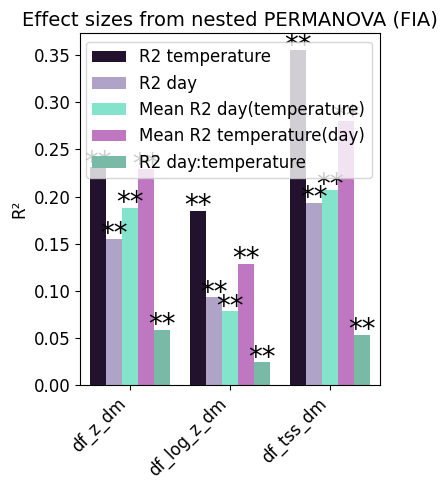

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Distance metrics to include
selected_matrices = [
    'df_z_dm',
    'df_log_z_dm',
    'df_tss_dm'
    
]

# Filter data
df = nested_results_df.copy()
df = df[df['Matrix'].isin(selected_matrices)]

# Melt to long format
melted = pd.melt(
    df,
    id_vars=['Matrix'],
    value_vars=[
        'R2 temperature',
        'R2 day',
        'Mean R2 day(temperature)',
        'Mean R2 temperature(day)',
        'R2 day:temperature'
    ],
    var_name='Factor',
    value_name='R2'
)

# Map to p-values
pval_map = {
    'R2 temperature': 'p temperature',
    'R2 day': 'p day',
    'Mean R2 day(temperature)': 'Mean p day(temperature)',
    'Mean R2 temperature(day)': 'Mean p temperature(day)',
    'R2 day:temperature': 'p day:temperature'
}

def get_significance(row):
    p = df.loc[df['Matrix'] == row['Matrix'], pval_map[row['Factor']]].values[0]
    if pd.isna(p):
        return ''
    elif p < 0.001:
        return '***'
    elif p < 0.01:
        return '**'
    elif p < 0.05:
        return '*'
    else:
        return ''

melted['Significance'] = melted.apply(get_significance, axis=1)
melted['Matrix'] = pd.Categorical(melted['Matrix'], categories=selected_matrices, ordered=True)

# Set color palette
palette = {
    'R2 temperature': '#240E31FF',  # Blue
    'R2 day': '#AC9ECEFF',  # Red
    'Mean R2 day(temperature)': '#74F3D3FF',  # Orange
    'Mean R2 temperature(day)': '#CB6BCEFF',  # Green
    'R2 day:temperature': '#6EC5ABFF'  # Purple
}

# Plot with bar handle
plt.figure(figsize=(4,5))
ax = sns.barplot(data=melted, x='Matrix', y='R2', hue='Factor', palette=palette)

# Correctly place stars
for bar, (_, row) in zip(ax.patches, melted.iterrows()):
    height = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2
    if row['Significance']:
        ax.text(
            x, height -0.01,
            row['Significance'],
            ha='center', va='bottom',
            fontsize=20, color='black'
        )

# Final formatting
plt.title("Effect sizes from nested PERMANOVA (FIA)", fontsize=14)
plt.ylabel("R²", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.xlabel("", fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='', fontsize=12)
plt.grid(False)
plt.tight_layout()
plt.savefig("Figures/20250618_nested_permanova_effect_sizes_FIA_qiime.pdf", format='pdf', bbox_inches='tight')
plt.show()


/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


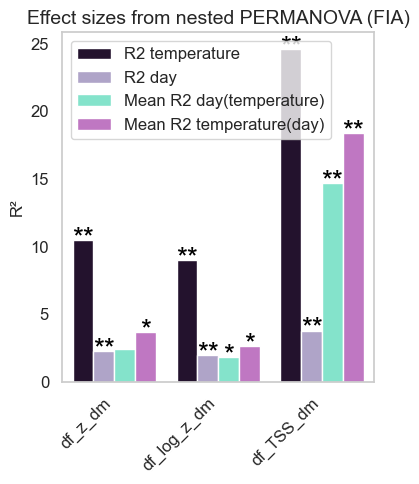

In [154]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Distance metrics to include
selected_matrices = [
    'df_z_dm',
    'df_log_z_dm',
    'df_TSS_dm',
    
    
]

# Filter data
df = nested_results_df.copy()
df = df[df['Matrix'].isin(selected_matrices)]

# Melt to long format
melted = pd.melt(
    df,
    id_vars=['Matrix'],
    value_vars=[
        'R2 temperature',
        'R2 day',
        'Mean R2 day(temperature)',
        'Mean R2 temperature(day)'
    ],
    var_name='Factor',
    value_name='R2'
)

# Map to p-values
pval_map = {
    'R2 temperature': 'p temperature',
    'R2 day': 'p day',
    'Mean R2 day(temperature)': 'Mean p day(temperature)',
    'Mean R2 temperature(day)': 'Mean p temperature(day)'
}

def get_significance(row):
    p = df.loc[df['Matrix'] == row['Matrix'], pval_map[row['Factor']]].values[0]
    if pd.isna(p):
        return ''
    elif p < 0.001:
        return '***'
    elif p < 0.01:
        return '**'
    elif p < 0.05:
        return '*'
    else:
        return ''

melted['Significance'] = melted.apply(get_significance, axis=1)
melted['Matrix'] = pd.Categorical(melted['Matrix'], categories=selected_matrices, ordered=True)

# Set color palette
palette = {
    'R2 temperature': '#240E31FF',  # Blue
    'R2 day': '#AC9ECEFF',  # Red
    'Mean R2 day(temperature)': '#74F3D3FF',  # Orange
    'Mean R2 temperature(day)': '#CB6BCEFF'  # Green
}

# Plot with bar handle
plt.figure(figsize=(4, 5))
ax = sns.barplot(data=melted, x='Matrix', y='R2', hue='Factor', palette=palette)

# Correctly place stars
for bar, (_, row) in zip(ax.patches, melted.iterrows()):
    height = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2
    if row['Significance']:
        ax.text(
            x, height -0.9,
            row['Significance'],
            ha='center', va='bottom',
            fontsize=20, color='black'
        )

# Final formatting
plt.title("Effect sizes from nested PERMANOVA (FIA)", fontsize=14)
plt.ylabel("R²", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.xlabel("", fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='', fontsize=12)
plt.grid(False)
plt.tight_layout()
plt.savefig("Figures/20250516_nested_permanova_effect_sizes_FIA.pdf", format='pdf', bbox_inches='tight')
plt.show()


In [117]:
print(melted[melted['Matrix'] == 'bray_dm_16S_ASV'])

Empty DataFrame
Columns: [Matrix, Factor, R2, Significance]
Index: []


and visualize per day/ per temperature

In [101]:
# selected_matrices1 = [
#  'jaccard_dm_16S_ASV',
#  'jaccard_dm_16S_OTU',
#  'jaccard_dm_16S_k',
#  'bray_dm_16S_ASV',
#  'bray_dm_16S_OTU',
#  'bray_dm_16S_k'
# ]

In [117]:
selected_matrices

['jaccard_dm_FIA', 'bray_dm_FIA']

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


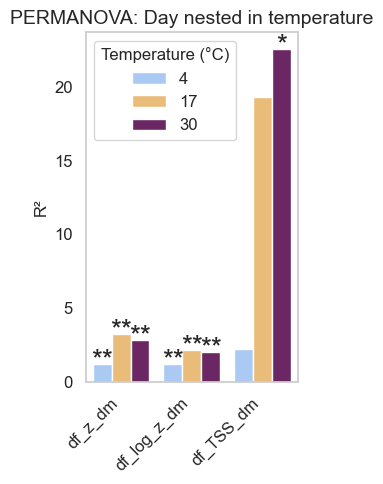

In [157]:
# Read detailed nested results per temperature
df_temp_nested = pd.read_csv("Stats/20250516_nested_permanova_per_temperature_beta_FIA.csv")

# Only include selected matrices
df_temp_nested = df_temp_nested[df_temp_nested['Matrix'].isin(selected_matrices)]

# Melt into long format
melted_temp = pd.melt(
    df_temp_nested,
    id_vars=['Matrix', 'temperature'],
    value_vars=['PERMANOVA R2 day(temperature)', 'p day(temperature)'],
    var_name='Metric',
    value_name='Value'
)

# Split into R2 and p-value
r2_df = melted_temp[melted_temp['Metric'].str.contains('R2')].rename(columns={'Value': 'R2'})
p_df = melted_temp[melted_temp['Metric'].str.contains('p ')].rename(columns={'Value': 'p_value'})

# Merge R2 and p-values
plot_df = pd.merge(r2_df[['Matrix', 'temperature', 'R2']], p_df[['Matrix', 'temperature', 'p_value']], on=['Matrix', 'temperature'])
base_colors = {
    '4': '#9EC8FFFF',
    '17': '#FDC067FF',
    '30': '#751C6DFF'
}

# base_colors = {
#     '#FDC067FF',
#     '#9EC8FFFF',
    
#     '#751C6DFF'
# }

# Add stars
def get_stars(p):
    if pd.isna(p): return ''
    elif p < 0.001: return '***'
    elif p < 0.01: return '**'
    elif p < 0.05: return '*'
    return ''

plot_df['Significance'] = plot_df['p_value'].apply(get_stars)



# Plot per temperature
plt.figure(figsize=(3, 5))
plot_df['temperature'] = pd.Categorical(
    plot_df['temperature'].astype(str),
    categories=['4', '17', '30'],
    ordered=True
)
plot_df['Matrix'] = plot_df['Matrix'].astype(str).str.strip()
plot_df['Matrix'] = pd.Categorical(plot_df['Matrix'], categories=selected_matrices, ordered=True)



ax = sns.barplot(
    data=plot_df,
    x='Matrix',
    y='R2',
    hue='temperature',
    palette=base_colors
)



# Add significance stars
for bar, (_, row) in zip(ax.patches, plot_df.iterrows()):
    height = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2
    if row['Significance']:
        ax.text(x, height -0.7 , row['Significance'], ha='center', va='bottom', fontsize=20)

plt.title("PERMANOVA: Day nested in temperature", fontsize=14)
plt.ylabel("R²", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.xlabel("", fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Temperature (°C)', fontsize=12)
plt.grid(False)
plt.tight_layout()
plt.savefig("Figures/20250516_nested_permanova_effect_sizes_per_temperature_FIA.pdf", format='pdf', bbox_inches='tight')
plt.show()


/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


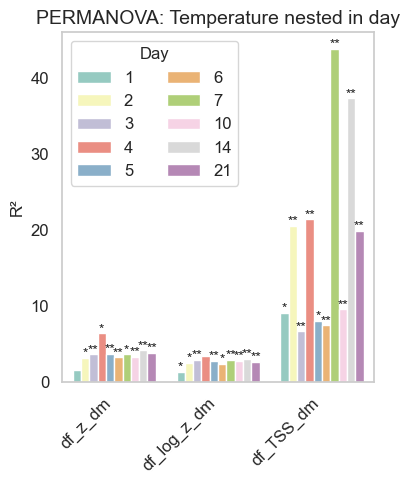

In [159]:
# Read detailed nested results per temperature
df_temp_nested = pd.read_csv("Stats/20250516_nested_permanova_per_day_temperature_beta_FIA.csv")

# Only include selected matrices
df_temp_nested = df_temp_nested[df_temp_nested['Matrix'].isin(selected_matrices)]

# Melt into long format
melted_temp = pd.melt(
    df_temp_nested,
    id_vars=['Matrix', 'day'],
    value_vars=['PERMANOVA R2 temperature(day)', 'p temperature(day)'],
    var_name='Metric',
    value_name='Value'
)

# Split into R2 and p-value
r2_df = melted_temp[melted_temp['Metric'].str.contains('R2')].rename(columns={'Value': 'R2'})
p_df = melted_temp[melted_temp['Metric'].str.contains('p ')].rename(columns={'Value': 'p_value'})

# Merge R2 and p-values
plot_df = pd.merge(r2_df[['Matrix', 'day', 'R2']], p_df[['Matrix', 'day', 'p_value']], on=['Matrix', 'day'])

# Add stars
def get_stars(p):
    if pd.isna(p): return ''
    elif p < 0.001: return '***'
    elif p < 0.01: return '**'
    elif p < 0.05: return '*'
    return ''

plot_df['Significance'] = plot_df['p_value'].apply(get_stars)
plot_df['Matrix'] = pd.Categorical(plot_df['Matrix'], categories=selected_matrices, ordered=True)

# Set color palette with 11 different colors:
palette = sns.color_palette("Set3", 11) 


# Plot per temperature
plt.figure(figsize=(4, 5))
ax = sns.barplot(data=plot_df, x='Matrix', y='R2', hue='day', palette=palette)

# Add significance stars
for bar, (_, row) in zip(ax.patches, plot_df.iterrows()):
    height = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2
    if row['Significance']:
        ax.text(x, height -0.3, row['Significance'], ha='center', va='bottom', fontsize=10)

plt.title("PERMANOVA: Temperature nested in day", fontsize=14)
plt.ylabel("R²", fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.legend(title='Day', fontsize=12, ncol=2)
plt.xlabel("", fontsize=12)
plt.grid(False)
plt.tight_layout()
plt.savefig("Figures/20250516_nested_permanova_effect_sizes_per_day_FIA.pdf", format='pdf', bbox_inches='tight')
plt.show()